# Calculate Shapley values

Shapley values as used in coalition game theory were introduced by William Shapley in 1953.  
[Scott Lundberg](http://scottlundberg.com/) applied Shapley values for calculating feature importance in [2017](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf).  

If you want to read the paper, I recommend reading:  
Abstract, 1 Introduction, 2 Additive Feature Attribution Methods, (skip 2.1, 2.2, 2.3), and 2.4 Classic Shapley Value Estimation.

Lundberg calls this feature importance method "SHAP", which stands for SHapley Additive exPlanations.

Here’s the formula for calculating Shapley values:

$ \phi_{i} = \sum_{S \subseteq M \setminus i} \frac{|S|! (|M| - |S| -1 )!}{|M|!} [f(S \cup i) - f(S)]$

A key part of this is the difference between the model’s prediction with the feature $i$, and the model’s prediction without feature $i$.  
$S$ refers to a subset of features that doesn’t include the feature for which we're calculating $\phi_i$.  
$S \cup i$ is the subset that includes features in $S$ plus feature $i$.  
$S \subseteq M \setminus i$ in the $\Sigma$ symbol is saying, all sets $S$ that are subsets of the full set of features $M$, excluding feature $i$.  

##### Options for your learning journey
* If you’re okay with just using this formula, you can skip ahead to the coding section below.   
* If you would like an explanation for what this formula is doing, please continue reading here.

## Optional (explanation of this formula)

The part of the formula with the factorials calculates the number of ways to generate the collection of features, where order matters.

$\frac{|S|! (|M| - |S| -1 )!}{|M|!}$

#### Adding features to a Coalition

The following concepts come from coalition game theory, so when we say "coalition", think of it as a team, where members of the team are added, one after another, in a particular order.

Let’s imagine that we’re creating a coalition of features, by adding one feature at a time to the coalition, and including all $|M|$ features.  Let’s say we have 3 features total.  Here are all the possible ways that we can create this “coalition” of features.

<ol>
    <li>$x_0,x_1,x_2$</li>
    <li>$x_0,x_2,x_1$</li>
    <li>$x_1,x_0,x_2$</li>
    <li>$x_1,x_2,x_0$</li>
    <li>$x_2,x_0,x_1$</li>
    <li>$x_2,x_1,x_0$</li>
</ol>

Notice that for $|M| = 3$ features, there are $3! = 3 \times 2 \times 1 = 6$ possible ways to create the coalition.

#### marginal contribution of a feature

For each of the 6 ways to create a coalition, let's see how to calculate the marginal contribution of feature $x_2$.

<ol>
<li>Model’s prediction when it includes features 0,1,2, minus the model’s prediction when it includes only features 0 and 1.  

$x_0,x_1,x_2$: $f(x_0,x_1,x_2) - f(x_0,x_1)$  


<li>Model’s prediction when it includes features 0 and 2, minus the prediction when using only feature 0.  Notice that feature 1 is added after feature 2, so it’s not included in the model.  
    
$x_0,x_2,x_1$: $f(x_0,x_2) - f(x_0)$</li>


<li>Model's prediction including all three features, minus when the model is only given features 1 and 0.  

$x_1,x_0,x_2$: $f(x_1,x_0,x_2) - f(x_1,x_0)$</li>


<li>Model's prediction when given features 1 and 2, minus when the model is only given feature 1.  
    
$x_1,x_2,x_0$: $f(x_1,x_2) - f(x_1)$</li>


<li>Model’s prediction if it only uses feature 2, minus the model’s prediction if it has no features.  When there are no features, the model’s prediction would be the average of the labels in the training data.  
    
$x_2,x_0,x_1$: $f(x_2) - f( )$
</li>


<li>Model's prediction (same as the previous one)  
    
$x_2,x_1,x_0$: $f(x_2) - f( )$
</li>

Notice that some of these marginal contribution calculations look the same.  For example the first and third sequences, $f(x_0,x_1,x_2) - f(x_0,x_1)$ would get the same result as $f(x_1,x_0,x_2) - f(x_1,x_0)$.  Same with the fifth and sixth.  So we can use factorials to help us calculate the number of permutations that result in the same marginal contribution.


#### break into 2 parts

To get to the formula that we saw above, we can break up the sequence into two sections: the sequence of features before adding feature $i$; and the sequence of features that are added after feature $i$.

For the set of features that are added before feature $i$, we’ll call this set $S$.  For the set of features that are added after feature $i$ is added, we’ll call this $Q$.

So, given the six sequences, and that feature $i$ is $x_2$ in this example, here’s what set $S$ and $Q$ are for each sequence:

<ol>
    <li>$x_0,x_1,x_2$: $S$ = {0,1}, $Q$ = {}</li>
    <li>$x_0,x_2,x_1$: $S$ = {0},   $Q$ = {1}  </li>
    <li>$x_1,x_0,x_2$: $S$ = {1,0}, $Q$ = {}  </li>
    <li>$x_1,x_2,x_0$: $S$ = {1}, $Q$ = {0}  </li>
    <li>$x_2,x_0,x_1$: $S$ = {}, $Q$ = {0,1}  </li>
    <li>$x_2,x_1,x_0$: $S$ = {}, $Q$ = {1,0}  </li>
</ol>
So for the first and third sequences, these have the same set S = {0,1} and same set $Q$ = {}.  
Another way to calculate that there are two of these sequences is to take $|S|! \times |Q|! = 2! \times 0! = 2$.

Similarly, the fifth and sixth sequences have the same set S = {} and Q = {0,1}.  
Another way to calculate that there are two of these sequences is to take $|S|! \times |Q|! = 0! \times 2! = 2$.


#### And now, the original formula

To use the notation of the original formula, note that $|Q| = |M| - |S| - 1$.

Recall that to calculate that there are 6 total sequences, we can use $|M|! = 3! = 3 \times 2 \times 1 = 6$.  
We’ll divide $|S|! \times (|M| - |S| - 1)!$ by $|M|!$ to get the proportion assigned to each marginal contribution.   
This is the weight that will be applied to each marginal contribution, and the weights sum to 1.

So that’s how we get the formula:  

$\frac{|S|! (|M| - |S| -1 )!}{|M|!} [f(S \cup i) - f(S)]$  

for each set $S \subseteq M \setminus i$

We can sum up the weighted marginal contributions for all sets $S$, and this represents the importance of feature $i$.

You’ll get to practice this in code!

In [1]:
import sys
!{sys.executable} -m pip install numpy==1.14.5
!{sys.executable} -m pip install scikit-learn==0.19.1
!{sys.executable} -m pip install graphviz==0.9
!{sys.executable} -m pip install shap==0.25.2

    100% |████████████████████████████████| 12.2MB 38kB/s  eta 0:00:01  9% |███                             | 1.1MB 27.0MB/s eta 0:00:01    30% |█████████▊                      | 3.7MB 25.5MB/s eta 0:00:01    40% |█████████████                   | 4.9MB 27.1MB/s eta 0:00:01    70% |██████████████████████▊         | 8.6MB 26.3MB/s eta 0:00:01    90% |█████████████████████████████   | 11.0MB 25.6MB/s eta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |██████████████████████

In [2]:
import sklearn
import shap
import numpy as np
import graphviz
from math import factorial

## Generate input data and fit a tree model
We'll create data where features 0 and 1 form the "AND" operator, and feature 2 does not contribute to the prediction (because it's always zero).

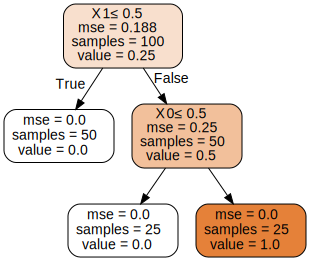

In [3]:
# AND case (features 0 and 1)
N = 100
M = 3
X = np.zeros((N,M))
X.shape
y = np.zeros(N)
X[:1 * N//4, 1] = 1
X[:N//2, 0] = 1
X[N//2:3 * N//4, 1] = 1
y[:1 * N//4] = 1

# fit model
model = sklearn.tree.DecisionTreeRegressor(random_state=0)
model.fit(X, y)

# draw model
dot_data = sklearn.tree.export_graphviz(model, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Calculate Shap values

We'll try to calculate the local feature importance of feature 0.  

We have 3 features, $x_0, x_1, x_2$.  For feature $x_0$, determine what the model predicts with or without $x_0$.  

Subsets S that exclude feature $x_0$ are:  
{}  
{$x_1$}  
{$x_2$}  
{$x_1,x_2$}  

We want to see what the model predicts with feature $x_0$ compared to the model without feature $x_0$:  
$f(x_0) - f( )$  
$f(x_0,x_1) - f(x_1)$   
$f(x_0,x_2) - f(x_2)$  
$f(x_0,x_1,x_2) - f(x_1,x_2)$  

## Sample data point
We'll calculate the local feature importance of a sample data point, where  
feature $x_0 = 1$   
feature $x_1 = 1$  
feature $x_2 = 1$  

In [4]:
sample_values = np.array([1,1,1])
print(f"sample values to calculate local feature importance on: {sample_values}")

sample values to calculate local feature importance on: [1 1 1]


## helper function

To make things easier, we'll use a helper function that takes the entire feature set M, and also a list of the features (columns) that we want, and puts them together into a 2D array.

In [5]:
def get_subset(X, feature_l):
    """
    Given a 2D array containing all feature columns,
    and a list of integers representing which columns we want,
    Return a 2D array with just the subset of features desired
    """
    cols_l = []
    for f in feature_l:
        cols_l.append(X[:,f].reshape(-1,1))
        
    return np.concatenate(cols_l, axis=1)

In [6]:
# try it out
tmp = get_subset(X,[0,2])
tmp[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## helper function to calculate permutation weight

This helper function calculates  

$\frac{|S|! (|M| - |S| - 1)!}{|M|!}$

In [7]:
from math import factorial
def calc_weight(size_S, num_features):
    return factorial(size_S) * factorial(num_features - size_S - 1) / factorial(num_features)

Try it out when size of S is 2 and there are 3 features total.  
The answer should be equal to $\frac{2! \times (3-2-1)!}{3!} = \frac{2 \times 1}{6} = \frac{1}{3}$


In [8]:
calc_weight(size_S=2,num_features=3)

0.3333333333333333

## case A  

Calculate the prediction of a model that uses features 0 and 1  
Calculate the prediction of a model that uses feature 1  
Calculate the difference (the marginal contribution of feature 0)

$f(x_0,x_1) - f(x_1)$

#### Calculate $f(x_0,x_1)$

In [9]:
# S_union_i
S_union_i = get_subset(X,[0,1])

# fit model
f_S_union_i = sklearn.tree.DecisionTreeRegressor()
f_S_union_i.fit(S_union_i, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Remember, for the sample input for which we'll calculate feature importance, we chose values of 1 for all features.

In [10]:
# This will throw an error

try:
    f_S_union_i.predict(np.array([1,1]))
except Exception as e:
    print(e)

Expected 2D array, got 1D array instead:
array=[1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


The error message says:

>Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

So we'll reshape the data so that it represents a sample (a row), which means it has 1 row and 1 or more columns.

In [11]:
# feature 0 and feature 1 are both 1 in the sample input
sample_input = np.array([1,1]).reshape(1,-1)
sample_input

array([[1, 1]])

The prediction of the model when it has features 0 and 1 is:

In [12]:
pred_S_union_i = f_S_union_i.predict(sample_input)
pred_S_union_i

array([1.])

When feature 0 and feature 1 are both 1, the prediction of the model is 1

#### Calculate $f(x_1)$

In [13]:
# S
S = get_subset(X,[1])
f_S = sklearn.tree.DecisionTreeRegressor()
f_S.fit(S, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

The sample input for feature 1 is 1.

In [14]:
sample_input = np.array([1]).reshape(1,-1)

The model's prediction when it is only training on feature 1 is:

In [15]:
pred_S = f_S.predict(sample_input)
pred_S

array([0.5])

When feature 1 is 1, then the prediction of this model is 0.5.  If you look at the data in X, this makes sense, because when feature 1 is 1, half of the time, the label in y is 0, and half the time, the label in y is 1. So on average, the prediction is 0.5

#### Calculate difference

In [16]:
diff_A = pred_S_union_i - pred_S
diff_A

array([0.5])

#### Calculate the weight
Calculate the weight assigned to the marginal contribution.  In this case, if this marginal contribution occurs 1 out of the 6 possible permutations of the 3 features, then its weight is 1/6

In [17]:
size_S = S.shape[1] # should be 1
weight_A = calc_weight(size_S, M)
weight_A # should be 1/6

0.16666666666666666

## Quiz: Case B

Calculate the prediction of a model that uses features 0 and 2  
Calculate the prediction of a model that uses feature 2  
Calculate the difference

$f(x_0,x_2) - f(x_2)$  

#### Calculate $f(x_0,x_2)$

In [ ]:
# TODO
S_union_i = get_subset(X,[0,2])
f_S_union_i = sklearn.tree.DecisionTreeRegressor()
f_S_union_i.fit(S_union_i, y)

sample_input = np.array([1,1]).reshape(1,-1)
pred_S_union_i = f_S_union_i.predict(sample_input)
pred_S_union_i

Since we're using features 0 and 2, and feature 2 doesn't help with predicting the output, then the model really just depends on feature 0.  When feature 0 is 1, half of the labels are 0, and half of the labels are 1.  So the average prediction is 0.5

#### Calculate $f(x_2)$  

In [ ]:
# TODO
S = get_subset(X,[2])
f_S = sklearn.tree.DecisionTreeRegressor()
f_S.fit(S, y)

sample_input = np.array([1]).reshape(1,-1)
pred_S = f_S.predict(sample_input)
pred_S

Since feature 2 doesn't help with predicting the labels in y, and feature 2 is 0 for all 100 training observations, then the prediction of the model is the average of all 100 training labels.  1/4 of the labels are 1, and the rest are 0.  So that prediction is 0.25

#### Calculate the difference in predictions

In [ ]:
# TODO
diff_B = pred_S_union_i - pred_S
diff_B

#### Calculate the weight

In [ ]:
# TODO
size_S = S.shape[1] # is 1
weight_B = calc_weight(size_S, M)
weight_B # should be 1/6

# Quiz: Case C

Calculate the prediction of a model that uses features 0,1 and 2  
Calculate the prediction of a model that uses feature 1 and 2  
Calculate the difference

$f(x_0,x_1,x_2) - f(x_1,x_2)$  

#### Calculate $f(x_0,x_1,x_2) $ 

In [ ]:
# TODO
S_union_i = get_subset(X,[0,1,2])
f_S_union_i = sklearn.tree.DecisionTreeRegressor()
f_S_union_i.fit(S_union_i, y)

sample_input = np.array([1,1,1]).reshape(1,-1)
pred_S_union_i = f_S_union_i.predict(sample_input)
pred_S_union_i

When we use all three features, the model is able to predict that if feature 0 and feature 1 are both 1, then the label is 1.

#### Calculate $f(x_1,x_2)$  

In [ ]:
# TODO
S = get_subset(X,[1,2])
f_S = sklearn.tree.DecisionTreeRegressor()
f_S.fit(S, y)

sample_input = np.array([1,1]).reshape(1,-1)
pred_S = f_S.predict(sample_input)
pred_S

When the model is trained on features 1 and 2, then its training data tells it that half of the time, when feature 1 is 1, the label is 0; and half the time, the label is 1.  So the average prediction of the model is 0.5

#### Calculate difference in predictions

In [ ]:
# TODO
diff_C = pred_S_union_i - pred_S
diff_C

#### Calculate weights

In [ ]:
# TODO
size_S = S.shape[1]
weight_C = calc_weight(size_S,M) # should be 2 / 6 = 1/3
weight_C

## Quiz: case D: remember to include the empty set!

The empty set is also a set.  We'll compare how the model does when it has no features, and see how that compares to when it gets feature 0 as input.

Calculate the prediction of a model that uses features 0.  
Calculate the prediction of a model that uses no features.  
Calculate the difference

$f(x_0) - f()$ 

#### Calculate $f(x_0)$

In [ ]:
# TODO
S_union_i = get_subset(X,[0])
f_S_union_i = sklearn.tree.DecisionTreeRegressor()
f_S_union_i.fit(S_union_i, y)

sample_input = np.array([1]).reshape(1,-1)
pred_S_union_i = f_S_union_i.predict(sample_input)
pred_S_union_i

With just feature 0 as input, the model predicts 0.5

#### Calculate $f()$
**hint**: you don't have to fit a model, since there are no features to input into the model.

In [ ]:
# TODO
# with no input features, the model will predict the average of the labels, which is 0.25
pred_S = np.mean(y)
pred_S

With no input features, the model's best guess is the average of the labels, which is 0.25

#### Calculate difference in predictions

In [ ]:
# TODO
diff_D = pred_S_union_i - pred_S
diff_D

#### Calculate weight

We expect this to be: 0! * (3-0-1)! / 3! = 2/6 = 1/3

In [ ]:
# TODO
size_S = 0
weight_D = calc_weight(size_S,M) # weight is 1/3
weight_D

# Calculate Shapley value
For a single sample observation, where feature 0 is 1, feature 1 is 1, and feature 2 is 1, calculate the shapley value of feature 0 as the weighted sum of the differences in predictions.

$\phi_{i} = \sum_{S \subseteq N \setminus i} weight_S \times (f(S \cup i) - f(S))$

In [ ]:
# TODO
shap_0 = weight_A * diff_A + weight_B * diff_B + weight_C * diff_C + weight_D * diff_D
shap_0

## Verify with the shap library

The [shap](https://github.com/slundberg/shap) library is written by Scott Lundberg, the creator of Shapley Additive Explanations.

In [ ]:
sample_values = np.array([1,1,1])
shap_values = shap.TreeExplainer(model).shap_values(sample_values)

print(f"Shapley value for feature 0 that we calculated: {shap_0}")
print(f"Shapley value for feature 0 is {shap_values[0]}")
print(f"Shapley value for feature 1 is {shap_values[1]}")
print(f"Shapley value for feature 2 is {shap_values[2]}")

## Quiz: Does this make sense?

The shap libary outputs the shap values for features 0, 1 and 2.  We can see that the shapley value for feature 0 matches what we calculated.  The Shapley value for feature 1 is also given the same importance as feature 0.  
* Given that the training data is simulating an AND operation, do you think these values make sense?  
* Do you think feature 0 and 1 are equally important, or is one more important than the other?  
* Does the importane of feature 2 make sense as well?
* How does this compare to the feature importance that's built into sci-kit learn?

## Answer



## Note
This method is general enough that it works for any model, not just trees.  There is an optimized way to calculate this when the complex model being explained is a tree-based model.  We'll look at that next.

## Solution

[Solution notebook](calculate_shap_solution.ipynb)